In [11]:
#importing packages used in notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.utils import np_utils
from keras.optimizers import Adam

In [12]:
#Importing given data set into pandas dataframe
Data=pd.read_csv('creditcard.csv')
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
#Checking for missing values in data
print(Data.isnull().sum())
#No missing data in dataset
#Describing dataset to check for outliers or skewed features
Data.describe()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


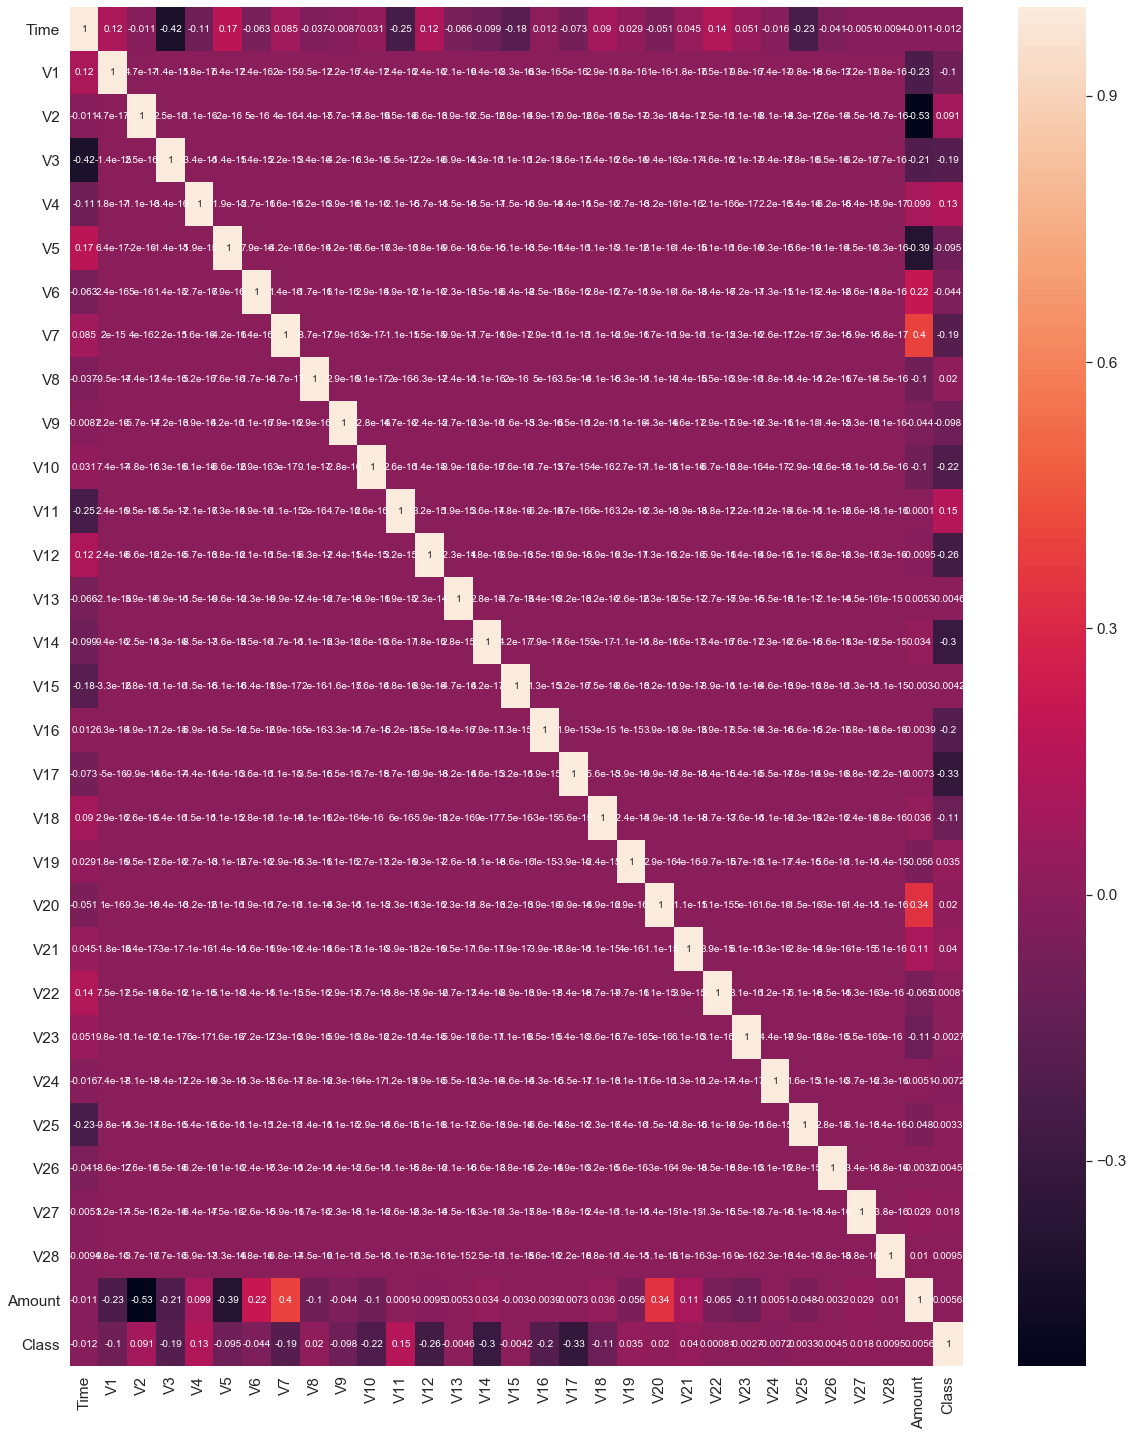

In [228]:
#creating correlation heatmap to see correlation between features
plt.figure(figsize=(20,25))
sns.heatmap(Data.corr(),annot=True, annot_kws={"size": 10})
#offsets to center heatmap values
b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t) 
plt.show() 

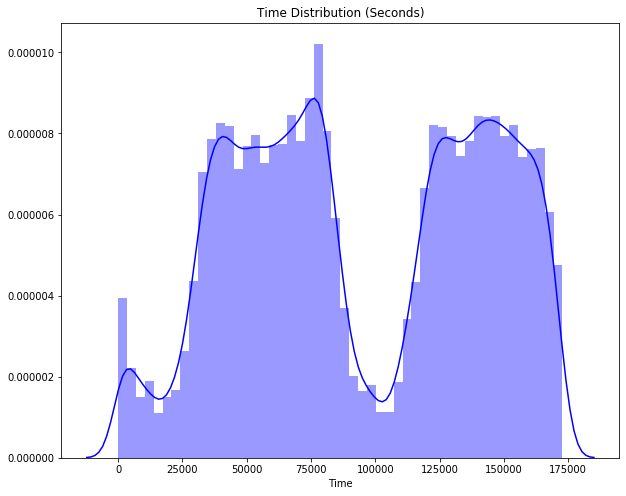

In [31]:
#plot of time feature distribution
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.distplot(Data['Time'],color='blue');

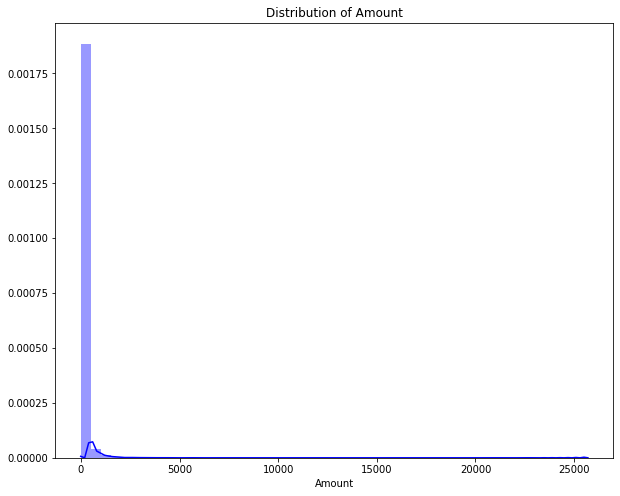

In [33]:
#plot the amount feature distribution
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(Data['Amount'],color='blue');

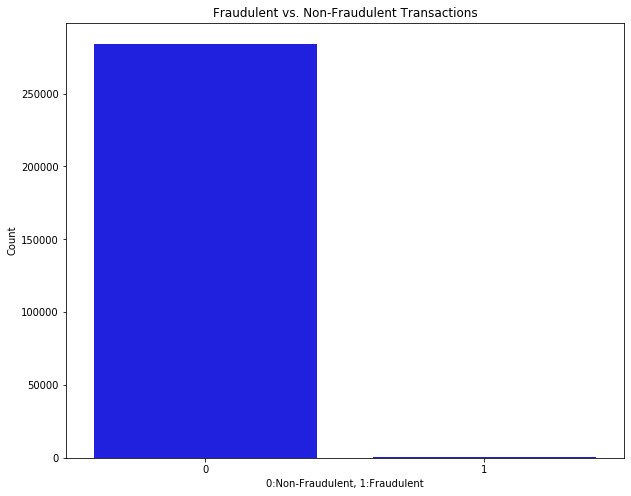

In [36]:
#barplot of fraud vs. non fraud cases to show class imbalance
fraud = Data['Class'].value_counts()[1]
nonfraud = Data['Class'].value_counts()[0]
plt.figure(figsize=(10,8))
sns.barplot(x=Data['Class'].value_counts().index,y=Data['Class'].value_counts(),color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent');

In [43]:
#seperating data into input and output variables
y=Data['Class']
X=Data.loc[:, Data.columns != 'Class']
from sklearn.model_selection import train_test_split
#Splitting data set into test set and training set with 70%-30% split
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.3,random_state=100)

In [44]:
from sklearn.preprocessing import MinMaxScaler
#scaling data to try and remove biased caused by the magnitude difference in each feature 
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#creating empty lists to contain performance metrics for different values of k
knn_Accuracy = []
knn_Precision = []
knn_Recall= []
knn_F1 = []

for k in range(3,9): 
    #looping through k=3 to k=8
    knn=KNeighborsClassifier(n_neighbors=k)
    #fitting training data to knn model
    knn.fit(X_train,y_train)
    #predicting output based on test input values
    y_pred =knn.predict(X_test)
    #appending metric scores to lists
    knn_Accuracy.append(accuracy_score(y_test, y_pred))
    knn_Precision.append(precision_score(y_test, y_pred))
    knn_Recall.append(recall_score(y_test, y_pred))
    knn_F1.append(f1_score(y_test, y_pred))

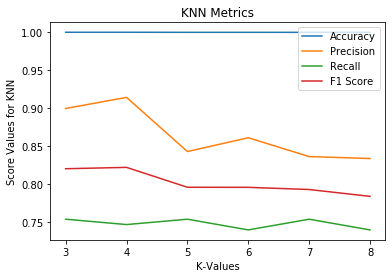

In [86]:
#plotting performance metrics in line graph for every value of K
plt.plot([i for i in range (3,9)], knn_Accuracy, label="Accuracy")
plt.plot([i for i in range (3,9)], knn_Precision, label="Precision")
plt.plot([i for i in range (3,9)], knn_Recall, label="Recall")
plt.plot([i for i in range (3,9)], knn_F1, label="F1 Score")
plt.title('KNN Metrics')
plt.ylabel('Score Values for KNN')
plt.xlabel('K-Values')
plt.legend(loc="upper right")

In [167]:
#creating decision tree classifier using scikit learn
from sklearn.tree import DecisionTreeClassifier
#importing classifier model
clf = DecisionTreeClassifier()
#fitting training data to model
clf = clf.fit(X_train,y_train)
#predicting outputs based on test data inputs
y_pred = clf.predict(X_test)

In [245]:
#computing accuracy of test data predictions
tree_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % tree_accuracy)

#computing precision of test data predictions
tree_precision = precision_score(y_test, y_pred)
print('Precision: %f' % tree_precision)

#computing recall of test data predictions
tree_recall = recall_score(y_test, y_pred)
print('Recall: %f' % tree_recall)

#computing f1_score of test data predictions
tree_f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % tree_f1)

#computing confusion matrix of test data predictions
tree_matrix = confusion_matrix(y_test, y_pred)
print(tree_matrix)

Accuracy: 0.998993
Precision: 0.679487
Recall: 0.746479
F1 score: 0.711409
[[85251    50]
 [   36   106]]


In [100]:
#importing modules from keras needed to create a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [153]:
#Developing keras Neural Network model with 5 layers
model=Sequential()

model.add(Dense(30,activation='relu'))
#Input layer with 30 input variables

model.add(Dropout(0.2))
#Dropout layer to guard against overfitting
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.add(Dense(10,activation='sigmoid'))
#3 Dense layers with varying acitivation functions and neurons in each layer seemed to produce the best results

model.add(Dense(1,activation='sigmoid'))
#1 output varible being fraud or not fraud, having a sigmoid activiation on the last layer greatly improved performance

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#compiling using adam as the optimizer and binary_crossentropy as the loss function

In [156]:
#model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10)
model.fit(x=X_train,y=y_train,batch_size=32,epochs=50)
#fitting model to training data, epochs>10 did not seem to have much impact
classes = model.predict_classes(X_test, verbose=0)
#predicting class of output variable for test data set

Epoch 1/50
199364/199364 [==============================] - 6s 29us/sample - loss: 0.0035 - acc: 0.9994
Epoch 2/50
199364/199364 [==============================] - 6s 30us/sample - loss: 0.0035 - acc: 0.9994
Epoch 3/50
199364/199364 [==============================] - 6s 29us/sample - loss: 0.0034 - acc: 0.9994
Epoch 4/50
199364/199364 [==============================] - 6s 28us/sample - loss: 0.0034 - acc: 0.9994
Epoch 5/50
199364/199364 [==============================] - 6s 28us/sample - loss: 0.0034 - acc: 0.9994
Epoch 6/50
199364/199364 [==============================] - 5s 27us/sample - loss: 0.0032 - acc: 0.9994
Epoch 7/50
199364/199364 [==============================] - 5s 26us/sample - loss: 0.0034 - acc: 0.9994
Epoch 8/50
199364/199364 [==============================] - 5s 26us/sample - loss: 0.0033 - acc: 0.9994
Epoch 9/50
199364/199364 [==============================] - 5s 27us/sample - loss: 0.0033 - acc: 0.9994
Epoch 10/50
199364/199364 [==============================] - 5s 

In [174]:
#computing accuracy of test data predictions
accuracy_NN = accuracy_score(y_test, classes)
print('Accuracy: %f' % accuracy_NN)

#computing precision of test data predictions
precision_NN = precision_score(y_test, classes)
print('Precision: %f' % precision_NN)

#computing recall of test data predictions
recall_NN = recall_score(y_test, classes)
print('Recall: %f' % recall_NN)

#computing f1_score of test data predictions
f1_NN = f1_score(y_test, y_pred)
print('F1 score: %f' % f1_NN)

#computing confusion matrix of test data predictions
matrix_NN = confusion_matrix(y_test, classes)
print(matrix_NN)

Accuracy: 0.999251
Precision: 0.804688
Recall: 0.725352
F1 score: 0.711409
[[85276    25]
 [   39   103]]


In [181]:
#trying PCA on features
from sklearn.decomposition import PCA
#using PCA to reduce input dimensions from 30 to 5
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [183]:
#splitting data obtained from pca transformation
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y.values,test_size=0.3,random_state=100)

In [184]:
#scaling pca transformed data
X_train_pca=scaler.fit_transform(X_train_pca)
X_test_pca=scaler.transform(X_test_pca)

In [256]:
#trying KNN with 4 neighbors model on PCA data since that produced high accuracy of the 3 models tested before
knn=KNeighborsClassifier(n_neighbors=4)
#fitting pca training data to model
knn.fit(X_train_pca,y_train_pca)
#predicting outputs from test pca inputs
y_pred_pca =knn.predict(X_test_pca)

In [264]:
#computing accuracy of test data predictions
pca_accuracy = accuracy_score(y_test_pca, y_pred_pca)
print('Accuracy: %f' % pca_accuracy)

#computing precision of test data predictions
pca_precision = precision_score(y_test_pca, y_pred_pca)
print('Precision: %f' % pca_precision)

#computing recall of test data predictions
pca_recall = recall_score(y_test_pca, y_pred_pca)
print('Recall: %f' % pca_recall)

#computing f1_score of test data predictions
pca_f1 = f1_score(y_test_pca, y_pred_pca)
print('F1 score: %f' % pca_f1)

#computing confusion matrix of test data predictions
pca_matrix = confusion_matrix(y_test_pca, y_pred_pca)
print(pca_matrix)

Accuracy: 0.998923
Precision: 0.867647
Recall: 0.415493
F1 score: 0.561905
[[85292     9]
 [   83    59]]


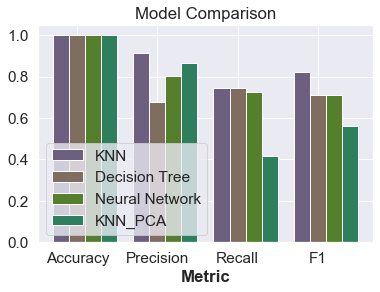

In [263]:
# set width of bar
barWidth = 0.20
 
# set height of bar from specificing variables to be graphed
PCA_KNN = [pca_accuracy, pca_precision, pca_recall, pca_f1]
KNN = [knn_Accuracy[1], knn_Precision[1],knn_Recall[1], knn_F1[1]]
Tree = [tree_accuracy, tree_precision, tree_recall, tree_f1]
NN = [accuracy_NN, precision_NN, recall_NN, f1_NN]
 
# Set position of bar on X axis
r1 = np.arange(len(KNN))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Plotting the data in bar graph
plt.bar(r1, KNN, color='#6d5f7f', width=barWidth, edgecolor='white', label='KNN')
plt.bar(r2, Tree, color='#7f6d5f', width=barWidth, edgecolor='white', label='Decision Tree')
plt.bar(r3, NN, color='#557f2d', width=barWidth, edgecolor='white', label='Neural Network')
plt.bar(r4, PCA_KNN, color='#2d7f5e', width=barWidth, edgecolor='white', label='KNN_PCA')

 
# Add xticks on the middle of the group bars
plt.title("Model Comparison")
plt.xlabel('Metric', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(KNN))], ['Accuracy', 'Precision', 'Recall', 'F1'])
 
# Create legend & Show graphic
plt.legend(loc="lower left")
plt.show()

In [241]:
#Found a function on github to make aesthetic confusion matrixes through seaborn heatmaps
#Courtesy of https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

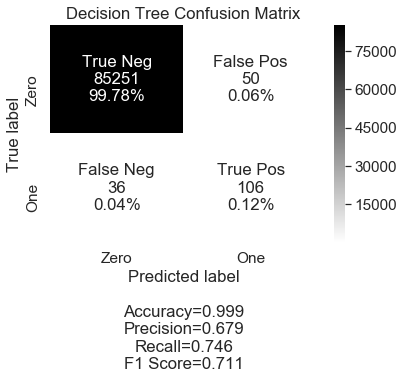

In [247]:
#Graphing confusion matrix for decision tree classifier
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix, group_names=labels,categories=categories, cmap='binary')
#offseting ylim in order to center data in confusion matrix
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.title("Decision Tree Confusion Matrix")
plt.show() 

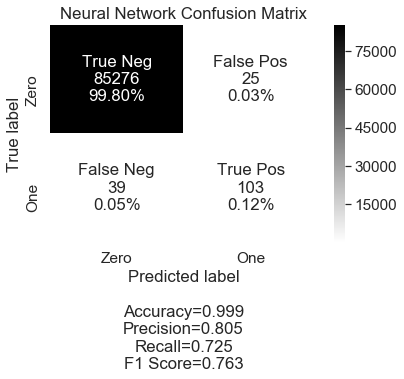

In [260]:
#Graphing confusion matrix for neural network 
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(matrix_NN, group_names=labels,categories=categories, cmap='binary')
#offseting ylim in order to center data in confusion matrix
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.title("Neural Network Confusion Matrix")
plt.show() 

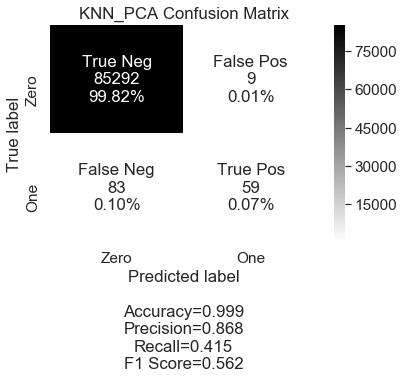

In [261]:
#Graphing confusion matrix for KNN model using PCA transformed data
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(pca_matrix, group_names=labels,categories=categories, cmap='binary')
#offseting ylim in order to center data in confusion matrix
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.title("KNN_PCA Confusion Matrix")
plt.show() 